### Analyzing sales made on bike stores

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# parse_dates=['Date'] will make datatype of Date column into datetime64[ns] otherwise it will be object datatype
sales = pd.read_csv(r"C:\Users\SHEHA\Downloads\GitHubRepository\SampleDatasets\sales_data.csv",parse_dates=['Date']) 
sales.head() 

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


### Exercises

In [8]:
# mean of Customers_Age
sales['Customer_Age'].mean()

35.91921157861212

<AxesSubplot: ylabel='Density'>

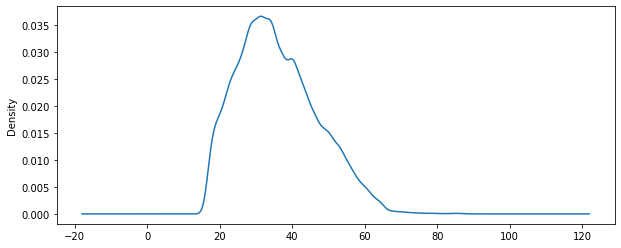

In [9]:
# density (KDE) (KDE meaning kernel density estimation) plot and a box plot with the Customer_Age data
sales['Customer_Age'].plot(kind='kde',figsize=(10,4)) 

<AxesSubplot: >

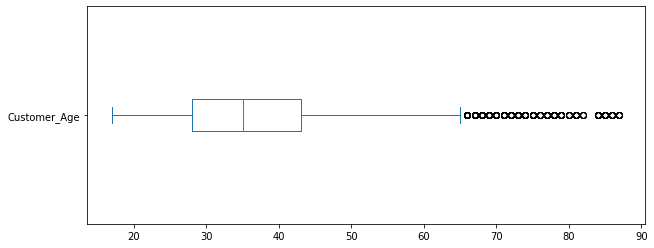

In [10]:
sales['Customer_Age'].plot(kind='box',vert=False,figsize=(10,4)) 

In [11]:
# mean of Order_Quantity
sales['Order_Quantity'].mean() 

11.901659648253654

<AxesSubplot: >

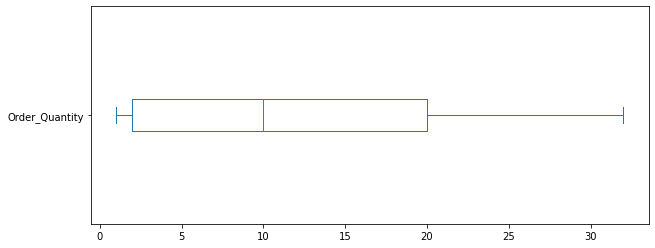

In [12]:
sales['Order_Quantity'].plot(kind='box',vert=False,figsize=(10,4)) 

<AxesSubplot: ylabel='Frequency'>

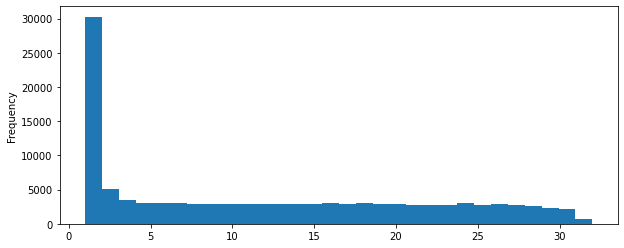

In [13]:
sales['Order_Quantity'].plot(kind='hist',bins=30,figsize=(10,4))

In [14]:
# sales per year
sales['Year'].value_counts()

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

<AxesSubplot: ylabel='Year'>

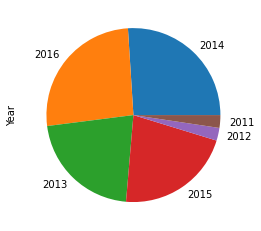

In [15]:
sales['Year'].value_counts().plot(kind='pie', figsize=(4,4))

In [16]:
# sales per month
sales['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

<AxesSubplot: >

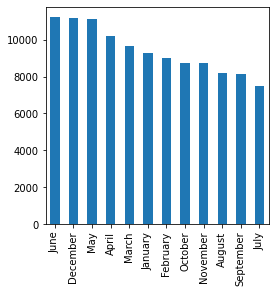

In [17]:
sales['Month'].value_counts().plot(kind='bar',figsize=(4,4))

In [18]:
# which country has the most sales quantity of sales
sales['Country'].value_counts().head(1)

United States    39206
Name: Country, dtype: int64

<AxesSubplot: >

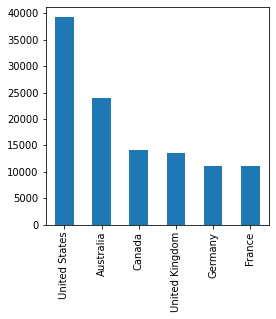

In [19]:
sales['Country'].value_counts().plot(kind='bar',figsize=(4,4))

In [20]:
# Create a list of every product sold
sales['Product'].value_counts()

Water Bottle - 30 oz.      10794
Patch Kit/8 Patches        10416
Mountain Tire Tube          6816
AWC Logo Cap                4358
Sport-100 Helmet, Red       4220
                           ...  
Mountain-100 Silver, 48       58
Mountain-100 Silver, 42       54
Mountain-500 Silver, 48       40
Road-650 Red, 52              32
Mountain-500 Black, 52        22
Name: Product, Length: 130, dtype: int64

In [21]:
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

In [22]:
len(sales['Product'].unique())

130

<AxesSubplot: >

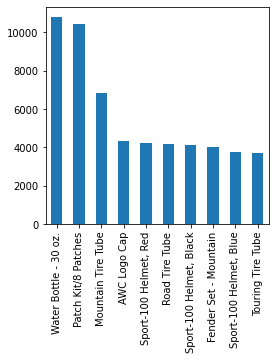

In [23]:
# Create a bar plot showing the 10 most sold products (best sellers)
sales['Product'].value_counts().head(10).plot(kind='bar',figsize=(4,4))

In [24]:
# relationship between Unit_Cost and Unit_Price
sales[['Unit_Cost','Unit_Price']].corr()

,Unit_Cost,Unit_Price
Unit_Cost,1.000000,0.997894
Unit_Price,0.997894,1.000000


<AxesSubplot: xlabel='Order_Quantity', ylabel='Profit'>

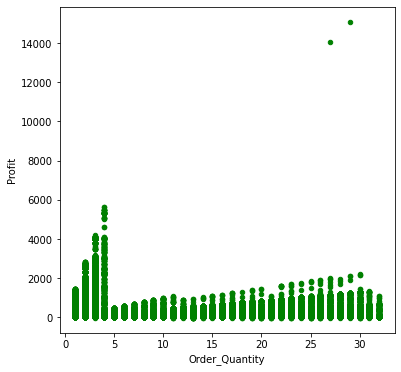

In [26]:
sales.plot(kind='scatter', x='Order_Quantity', y='Profit',c='green',figsize=(6,6))

<AxesSubplot: title={'center': 'Profit'}, xlabel='[Country]'>

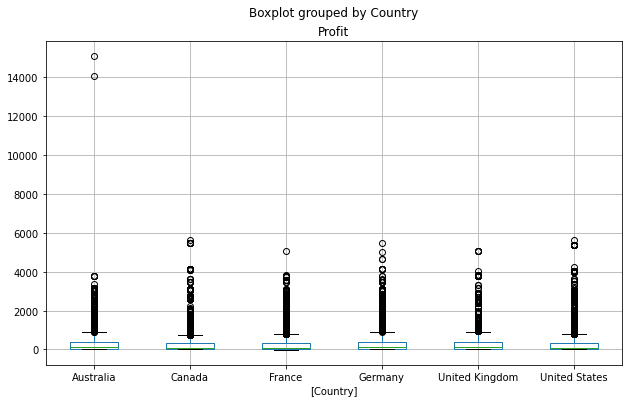

In [27]:
# relationship between Profit per Country
sales[['Profit','Country']].boxplot(by='Country', figsize=(10,6))

<AxesSubplot: title={'center': 'Customer_Age'}, xlabel='[Country]'>

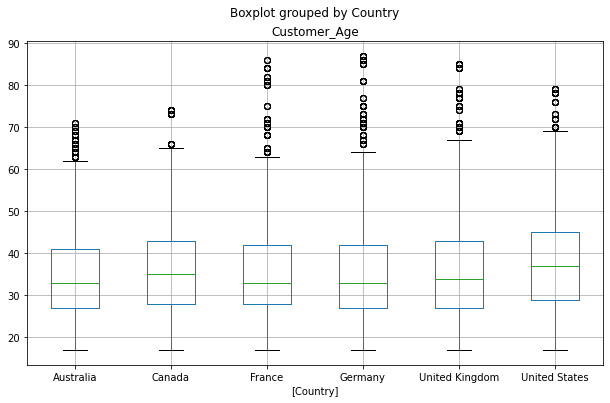

In [28]:
# relationship between the Customer_Age per Country
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

In [29]:
# Add and calculate a new Calculated_Date column
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

In [50]:
# Parse Calculated_Date column into a datetime object
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])
sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

<AxesSubplot: >

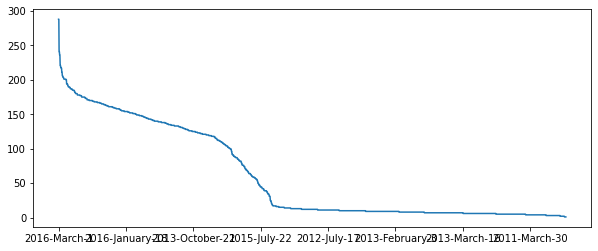

In [30]:
# sales evolve through years
# Show a line plot using Calculated_Date column as the x-axis and the count of sales as the y-axis
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(10,4))

In [31]:
# Increase 50 U$S revenue to every sale
sales['Revenue'] += 50

In [32]:
# How many orders were made in Canada or France
# shape[0] means row
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

25176

In [33]:
# How many Bike Racks orders were made from Canada
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

104

In [34]:
# How many orders were made in each region (state) of France
france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()
france_states

Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

<AxesSubplot: >

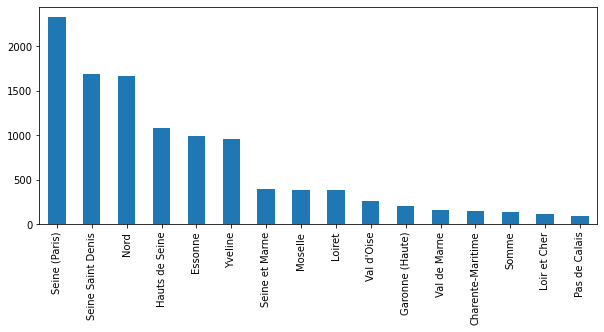

In [35]:
france_states.plot(kind='bar', figsize=(10,4))

In [36]:
# How many sales were made per category
sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

<AxesSubplot: ylabel='Product_Category'>

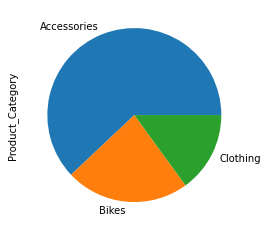

In [37]:
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(4,4))

In [38]:
# How many orders were made per accessory sub-categories
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()
accessories

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

<AxesSubplot: >

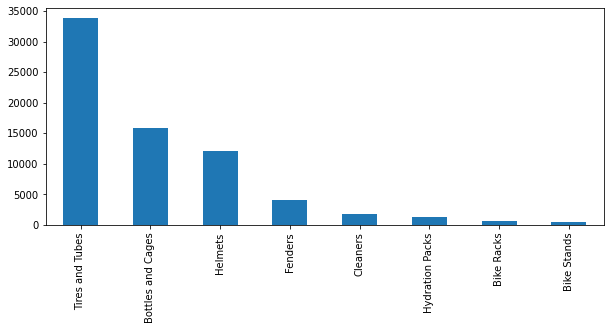

In [39]:
accessories.plot(kind='bar', figsize=(10,4))

In [40]:
sales['Sub_Category'].unique()

array(['Bike Racks', 'Bike Stands', 'Bottles and Cages', 'Caps',
       'Cleaners', 'Fenders', 'Gloves', 'Helmets', 'Hydration Packs',
       'Jerseys', 'Mountain Bikes', 'Road Bikes', 'Shorts', 'Socks',
       'Tires and Tubes', 'Touring Bikes', 'Vests'], dtype=object)

In [41]:
sales['Product_Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [42]:
# How many orders were made per bike sub-categories
bikesubcat = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()
bikesubcat

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

<AxesSubplot: ylabel='Sub_Category'>

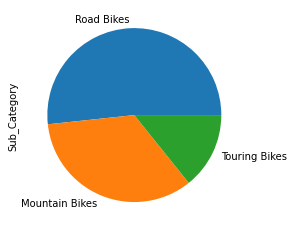

In [43]:
bikesubcat.plot(kind='pie', figsize=(4,4))

In [44]:
# Which gender has the most amount of sales
sales['Customer_Gender'].unique()

array(['M', 'F'], dtype=object)

In [45]:
sales['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

<AxesSubplot: >

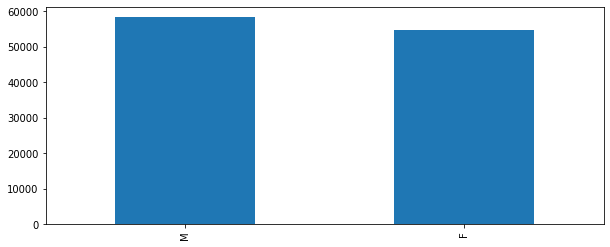

In [46]:
sales['Customer_Gender'].value_counts().plot(kind='bar',figsize=(10,4))

In [47]:
# How many sales with more than 500 in Revenue were made by men
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] > 500)].shape[0] 

23342

In [54]:
# sale with the highest revenue
sales['Revenue'].max()

58124

In [55]:
# top-5 sales with the highest revenue
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-July-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54119,2013-July-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14362,2011-July-8
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-April-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-September-30


In [71]:
# What is the mean Order_Quantity of orders with more than 10K in revenue
cond = sales['Revenue'] > 10000
cond.value_counts()

False    112859
True        177
Name: Revenue, dtype: int64

In [75]:
cond = sales['Revenue'] > 10000
sales.loc[cond,'Order_Quantity'].mean()

3.689265536723164

In [76]:
# What is the mean Order_Quantity of orders with less than 10K in revenue
cond = sales['Revenue'] < 10000
sales.loc[cond,'Order_Quantity'].mean()

11.914539380997528

In [77]:
# How many orders were made in May of 2016?
sales.loc[(sales['Month'] == 'May') & (sales['Year'] == 2016)].shape[0] 

5015

In [78]:
cond = (sales['Year'] == 2016) & (sales['Month'] == 'May')
sales.loc[cond].shape[0]

5015

In [81]:
# How many orders were made between May and July of 2016
sales.loc[(sales['Month'].isin(['May', 'June', 'July']) & (sales['Year'] == 2016))].shape[0] 

12164

In [87]:
# grouped box plot per month with the profit values
sales.loc[sales['Year'] == 2016, ['Profit', 'Month']].head()

,Profit,Month
3,1188,March
5,297,May
7,100,May
9,1046,February
19,74,January


<AxesSubplot: title={'center': 'Profit'}, xlabel='[Month]'>

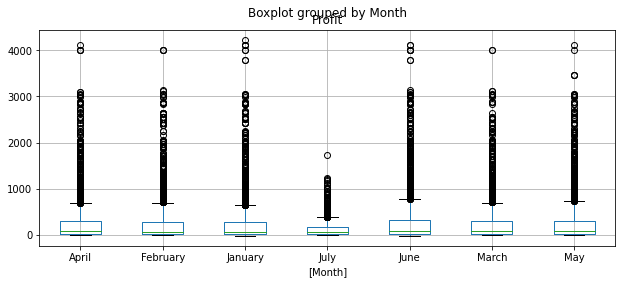

In [91]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]
profit_2016.boxplot(by='Month', figsize=(10,4))

In [101]:
# Add 7.2% TAX on every sale Unit_Price within United States
# first creating duplicate column of Unit_Price column named TAX_United States
sales['TAX_United States'] = sales.loc[:, 'Unit_Price']
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date,TAX_United States
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2013-November-26,120
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2015-November-26,120
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2451,2014-March-23,120
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2138,2016-March-23,120
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,468,2014-May-15,120


In [102]:
sales.loc[sales['Country'] == 'United States', 'TAX_United States'].head()

22    120
23    120
34    120
35    120
38    120
Name: TAX_United States, dtype: int64

In [104]:
sales.loc[sales['Country'] == 'United States', 'TAX_United States'] *= 1.072

In [119]:
sales.loc[sales['Country'] == 'United States', 'TAX_United States'].head()

22    128.64
23    128.64
34    128.64
35    128.64
38    128.64
Name: TAX_United States, dtype: float64

In [137]:
sales.loc[(sales['Country'] == 'United States'),'TAX_United States'].head()

22    128.64
23    128.64
34    128.64
35    128.64
38    128.64
Name: TAX_United States, dtype: float64

In [133]:
sales.loc[(sales['Country'].isin(['United States'])),('Country','TAX_United States')].head()

,Country,TAX_United States
22,United States,128.64
23,United States,128.64
34,United States,128.64
35,United States,128.64
38,United States,128.64


In [131]:
sales.loc[(sales['Country'].isin(['United States','Canada'])),('Country','TAX_United States')]

,Country,TAX_United States
0,Canada,120.000
1,Canada,120.000
14,Canada,120.000
15,Canada,120.000
16,Canada,120.000
...,...,...
113021,United States,68.608
113022,United States,68.608
113023,United States,68.608
113024,United States,68.608
